In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sqlite3
import glob
from matplotlib import pyplot as plt

In [58]:
def plot_country(country):
    conn = sqlite3.connect("covid.db")
    df_all = pd.read_sql("select * from daily where Country like '{0}'".format(country),conn)
    conn.close()
    df_all=df_all.sort_values('Date')
    df_plot=df_all[['Date','Confirmed','Deaths','Recovered']].fillna(0)
    df_plot['Infected'] = df_plot['Confirmed']-(df_plot['Recovered']-df_plot['Deaths'])
    df_plot.dtypes
    df_plot=df_plot.melt(['Date'])
    df_plot.head()
    plt.figure(figsize=(25,10))
    sns.set(style="whitegrid")
    sns.set_context("paper")
    c=sns.lineplot(x='Date',y='value',hue='variable',data=df_plot,markers=True,style='variable',dashes=False)
    c.set_xlabel("Count",fontsize=30)
    c.set_ylabel("Date",fontsize=30)
    for item in c.get_xticklabels():
        item.set_rotation(90)
        item.set_size(15)
    for item in c.get_yticklabels():
        item.set_size(15)

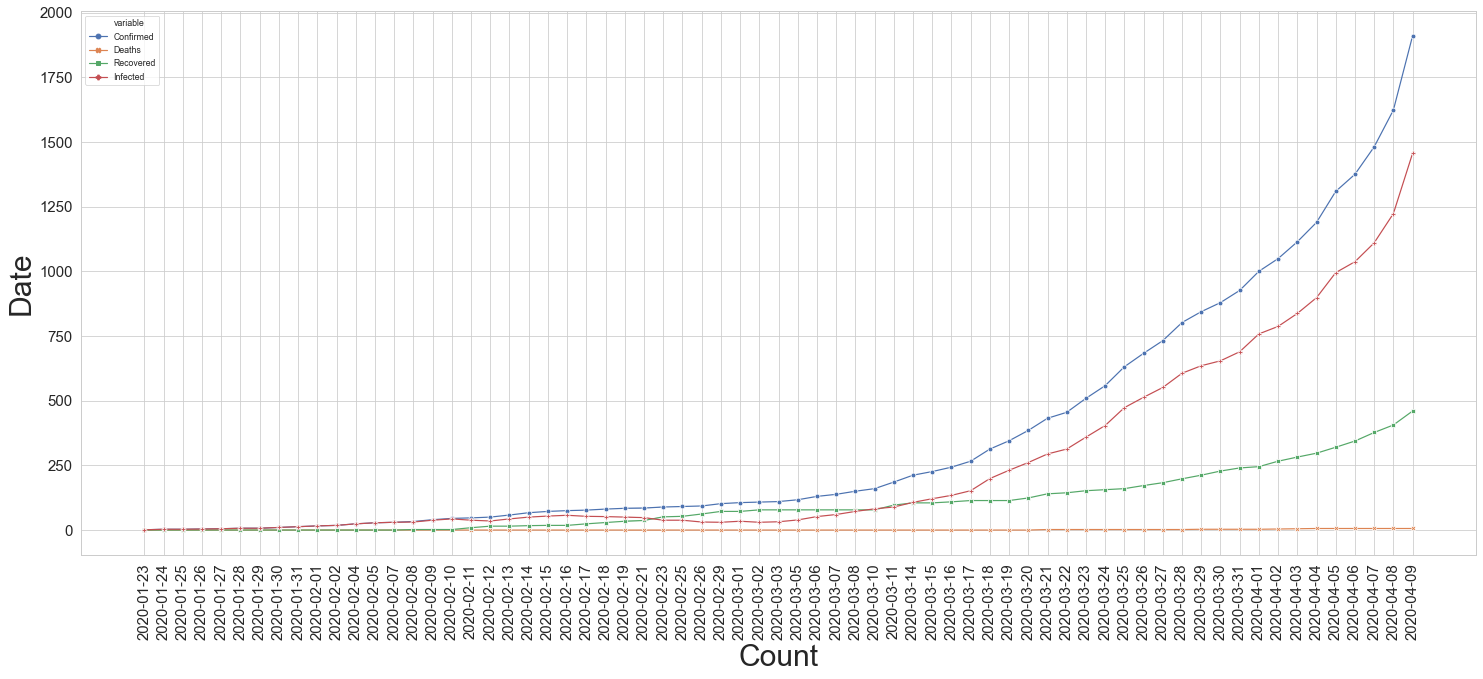

In [59]:
plot_country('Singapore')